In [9]:
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from PIL import Image
import matplotlib.pyplot as plt
path = '/mnt/c/Users/Bruno/Documents/pessoal/brumas/'
fnames = get_image_files(path + "gt/")

codes = np.loadtxt( path + 'classesNumber.txt', dtype=str, delimiter="\n",encoding='utf') 
codes = [code.split(": ")[1] for code in codes] #pega apenas o nome de cada classe e ignora o ID

print(len(fnames))



508


In [10]:

totalArray = []

for i in range(0,len(fnames)):
    img = Image.open(fnames[i])
    arr = np.asarray(img)
    totalArray += list(np.unique(arr,return_counts=False))




In [11]:
# print("Ground truth Codes",totalArray)

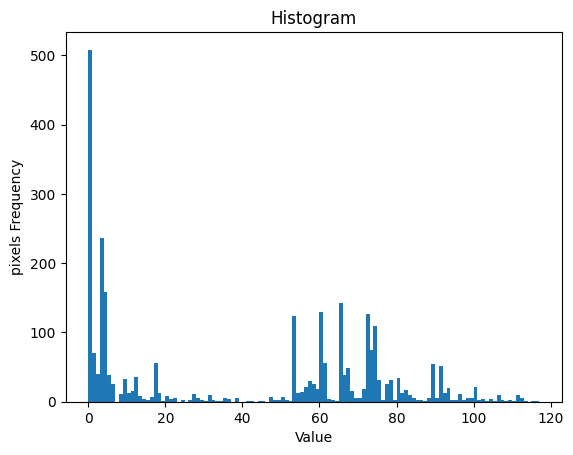

In [12]:
plt.show()
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
#hist function is used to plot the histogram of an image.
hist = plt.hist(totalArray, bins=len(codes), range=(0,len(codes)))

In [13]:
dicionario = {}

for code, contagem in zip(codes, hist[0]):
    dicionario[code] = int(contagem)

dicionario = {k: v for k, v in sorted(dicionario.items(), key=lambda item: item[1], reverse=True)} #sort

print(dicionario)

{'NaoAlimento': 508, 'Arroz Branco': 237, 'Feijão': 159, 'Alface': 142, 'Frango (sem osso)': 129, 'Tomate': 126, 'Carne de Vaca': 123, 'Cenoura': 109, 'Brócolis': 75, 'AlimentoNaoRegistrado': 71, 'Farofa': 56, 'Ovo': 56, 'Mix Vegetais': 54, 'Batata Frita': 52, 'Alface com Legumes': 49, 'Arroz Integral': 40, 'Arroz Integral e Feijao': 39, 'Alface com Tomate': 38, 'Pure de Batata': 36, 'Couve': 34, 'Batata': 33, 'Abobrinha': 32, 'Abóbora': 31, 'Carne moída': 30, 'Arroz Branco e Feijao': 26, 'Beterraba': 26, 'Peixe': 25, 'Linguiça': 21, 'Banana da Terra': 21, 'Pepino': 20, 'Tomate Cereja': 19, 'Frango (com osso)': 18, 'Couve Flor': 17, 'Batata Doce': 15, 'Vagem': 15, 'Strogonoff': 14, 'Cozido de Carne': 13, 'Repolho Branco': 13, 'Batata Palha': 12, 'Feijão Tropeiro': 12, 'Feijoada': 12, 'Macarrão': 11, 'Milho': 11, 'Macarrão com molho': 11, 'Banana': 10, 'Limão': 10, 'Vinagrete': 10, 'Quiabo': 9, 'Mandioca': 8, 'Lentilha': 8, 'Cuscuz': 7, 'Laranja sem Casca': 7, 'Pão Branco': 7, 'Maionese

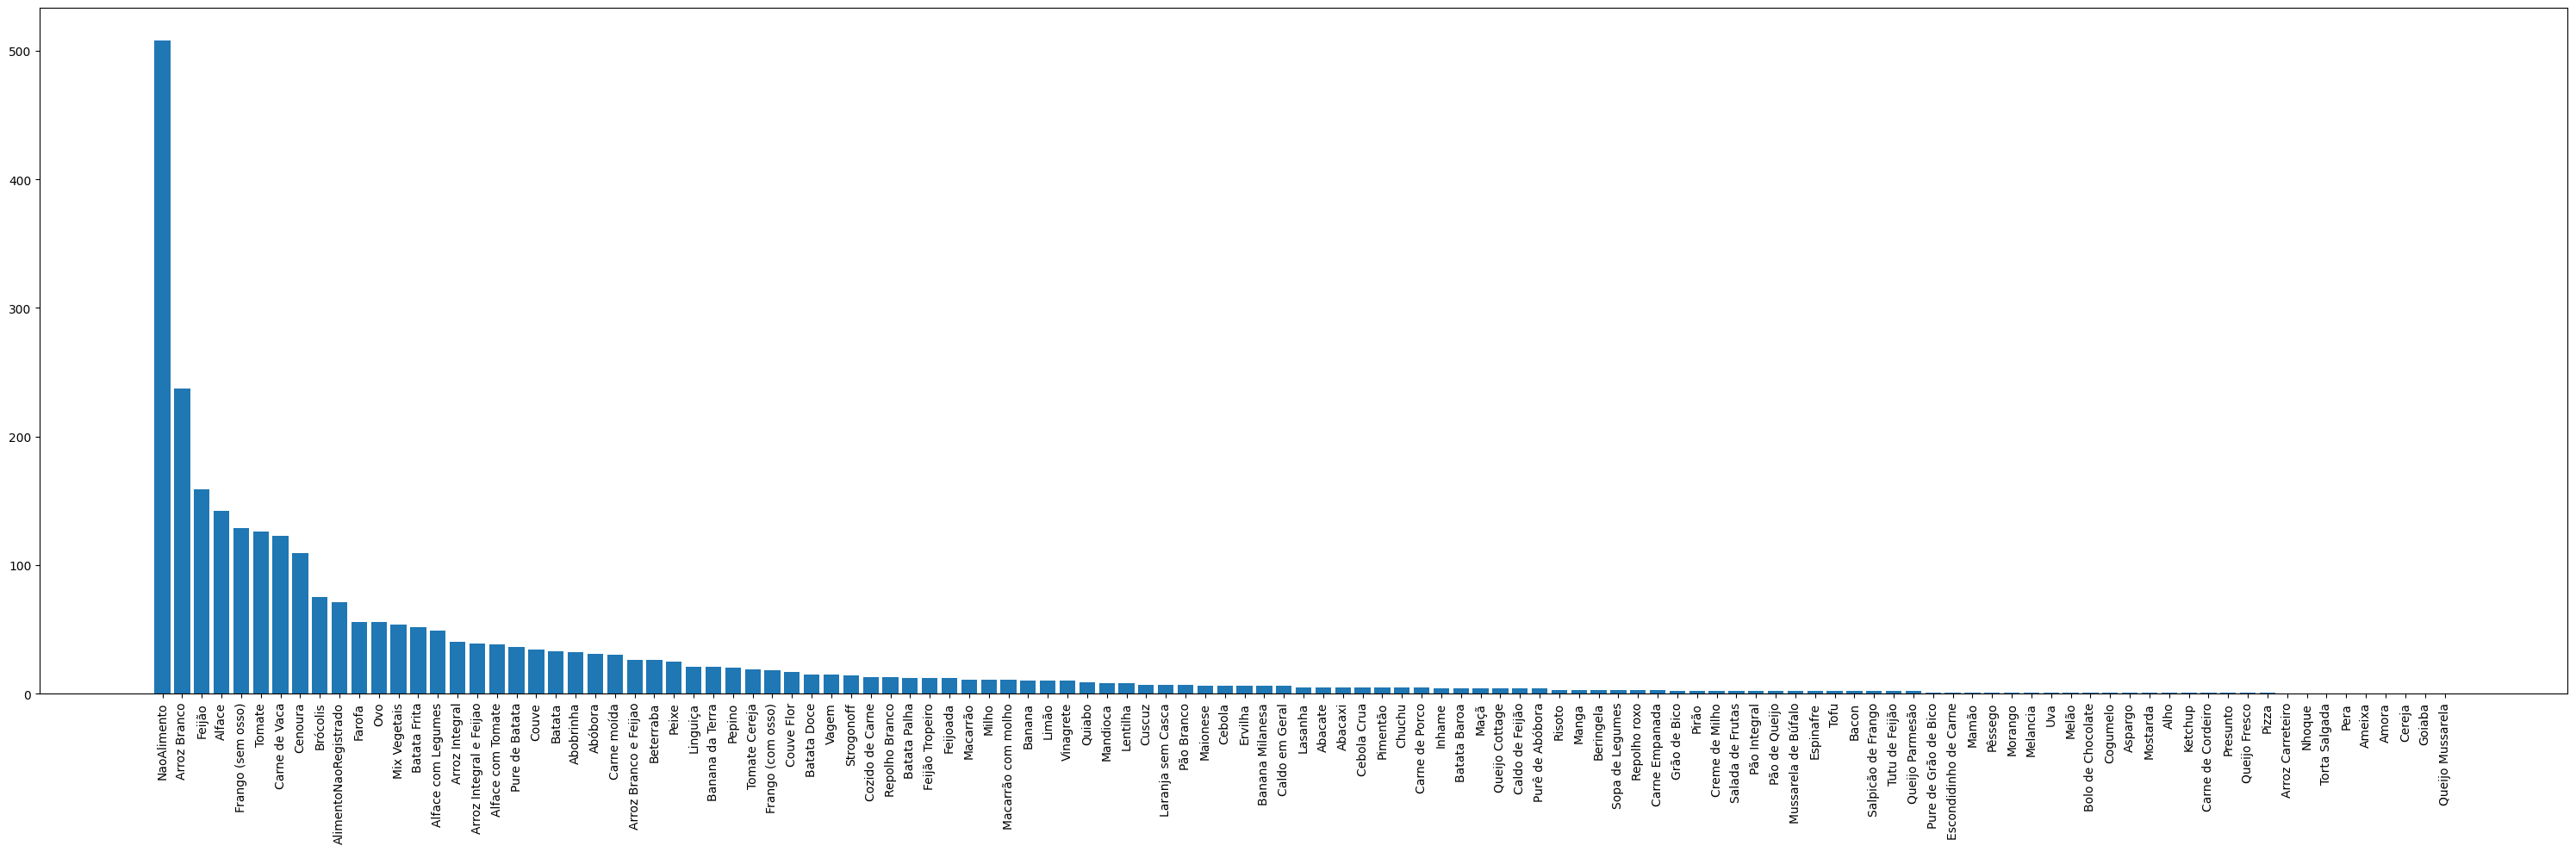

In [14]:
plt.figure(figsize=(30, 10))
plt.bar(*zip(*dicionario.items()))
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('classesHist.png')
plt.show()